In [1]:
# !pip install imblearn

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.style
plt.style.use('classic')

In [4]:
k1 = pd.read_csv('Firm_level_data.csv')

In [5]:
k1.head(5)

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [6]:
pm1 = k1.drop('Unnamed: 0', axis = 1)

In [7]:
pm1.head(5)

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [8]:
pm1['sp500'] = pm1['sp500'].map(lambda x: 1 if x == 'yes' else 0)

In [9]:
pm1.head(5)

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,0,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,0,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,1,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,0,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,0,1.063300,67.406408,49.46


In [10]:
pm1.dtypes

sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500             int64
tobinq          float64
value           float64
institutions    float64
dtype: object

In [11]:
pm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    int64  
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 53.5 KB


In [12]:
pm1.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
sp500,759.0,0.285903,0.452141,0.000000,0.000000,0.000000,1.000000,1.000000
tobinq,738.0,2.794910,3.366591,0.119001,1.018783,1.680303,3.139309,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160385,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


In [13]:
pm1.shape

(759, 9)

In [14]:
pm1.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

## Univariate Analysis

### Evaluating 'Sales'

In [15]:
pm1['sales'].unique()
pm1['sales'].value_counts()

215.759033      2
7261.001850     1
16588.184150    1
7046.737983     1
50.111003       1
               ..
2273.100314     1
3753.932924     1
72.566990       1
2535.583613     1
22.763998       1
Name: sales, Length: 758, dtype: int64

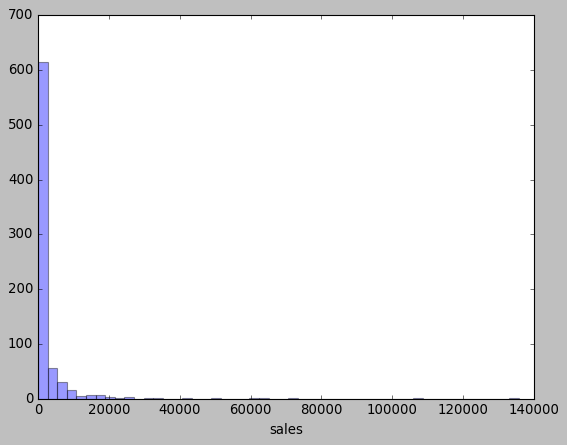

In [16]:
sns.distplot(pm1['sales'],kde=False)

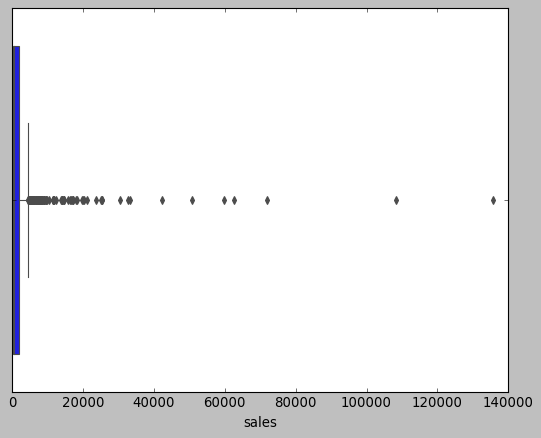

In [17]:
sns.boxplot(pm1['sales'])

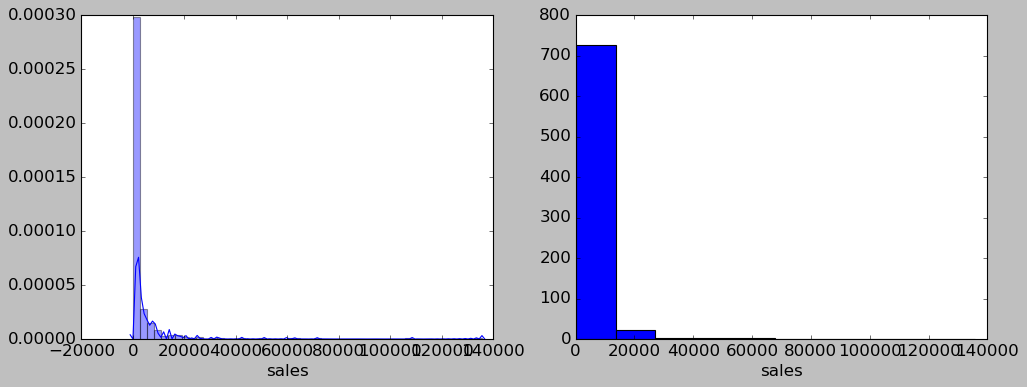

In [18]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(pm1['sales'],ax=ax2)
ax2.set_xlabel('sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(pm1['sales'])
ax3.set_xlabel('sales', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Evaluating 'capital'

In [19]:
pm1['capital'].unique()
pm1['capital'].value_counts()

208.791024     1
184.871017     1
79.257997      1
1.870000       1
7538.534000    1
              ..
113.450015     1
58.035987      1
3368.799041    1
52.840995      1
327.166017     1
Name: capital, Length: 759, dtype: int64

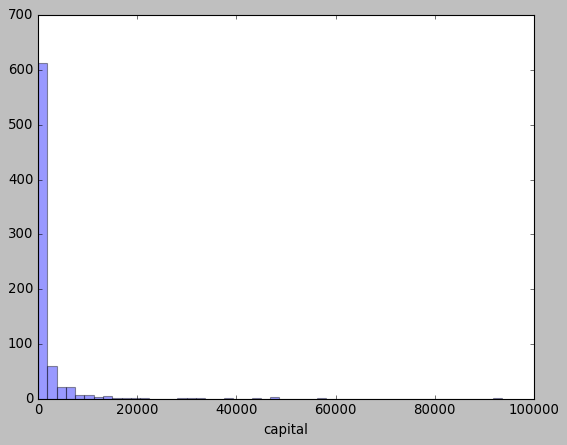

In [20]:
sns.distplot(pm1['capital'],kde=False)

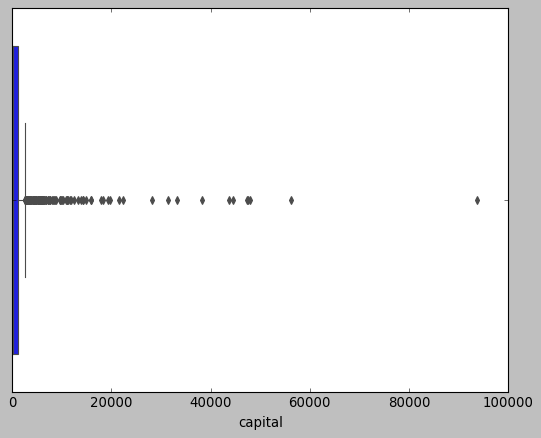

In [21]:
sns.boxplot(pm1['capital'])

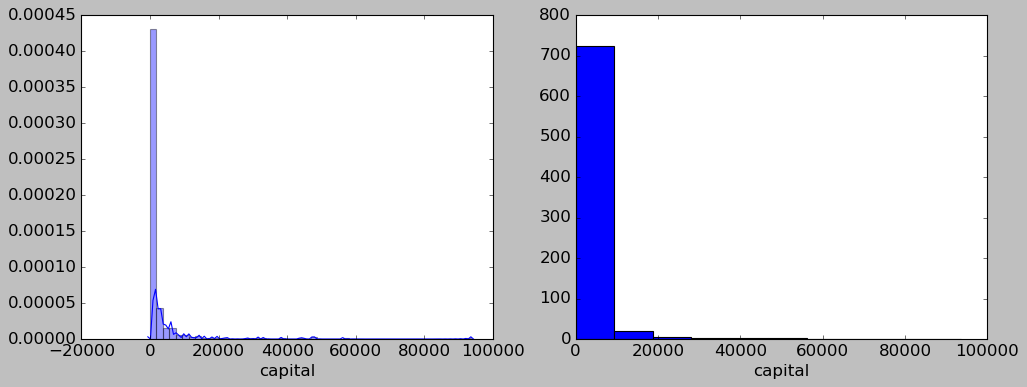

In [22]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))
#distplot
sns.distplot(pm1['capital'],ax=ax2)
ax2.set_xlabel('capital', fontsize=15)
ax2.tick_params(labelsize=15)
#histogram
ax3.hist(pm1['capital'])
ax3.set_xlabel('capital', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Evaluating 'patents'

In [23]:
pm1['patents'].unique()
pm1['patents'].value_counts()

0      181
1      113
2       73
3       48
5       35
      ... 
114      1
117      1
121      1
127      1
61       1
Name: patents, Length: 110, dtype: int64

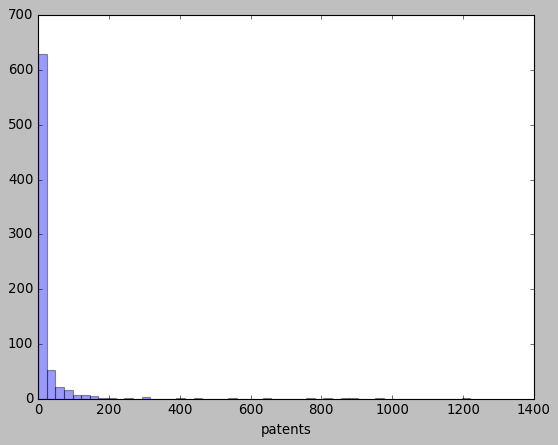

In [24]:
sns.distplot(pm1['patents'],kde=False)

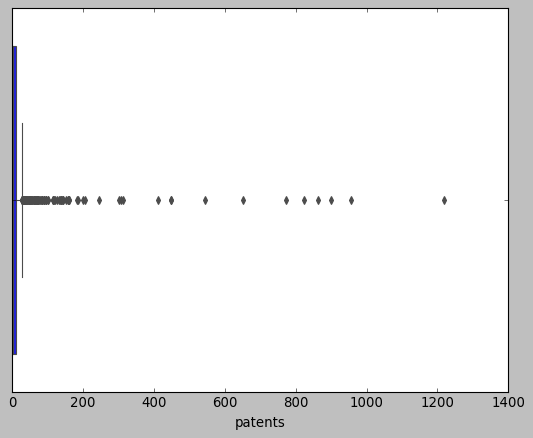

In [25]:
sns.boxplot(pm1['patents'])

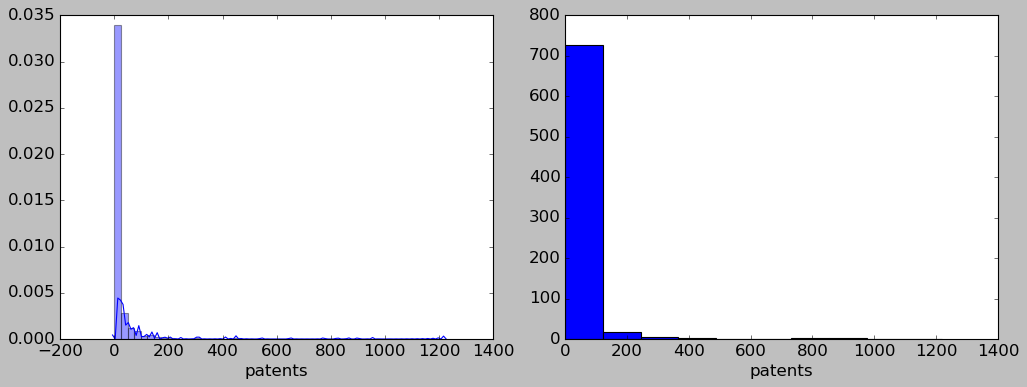

In [26]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))
#distplot
sns.distplot(pm1['patents'],ax=ax2)
ax2.set_xlabel('patents', fontsize=15)
ax2.tick_params(labelsize=15)
#histogram
ax3.hist(pm1['patents'])
ax3.set_xlabel('patents', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Evaluating 'randd'

In [27]:
pm1['randd'].unique()
pm1['randd'].value_counts()

0.000000       92
4.972944        1
554.671753      1
7814.445313     1
20.036547       1
               ..
47.331295       1
340.723846      1
349.111603      1
0.056460        1
146.534424      1
Name: randd, Length: 668, dtype: int64

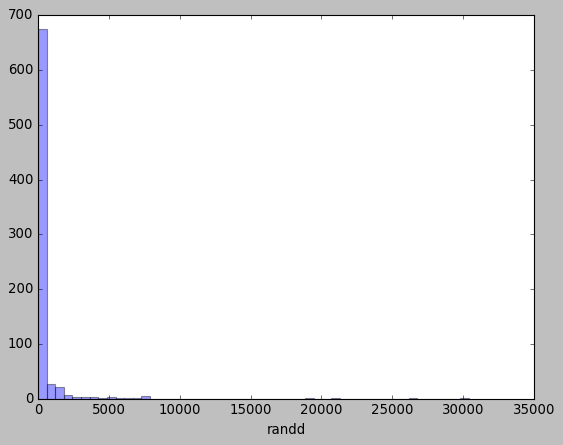

In [28]:
sns.distplot(pm1['randd'],kde=False)

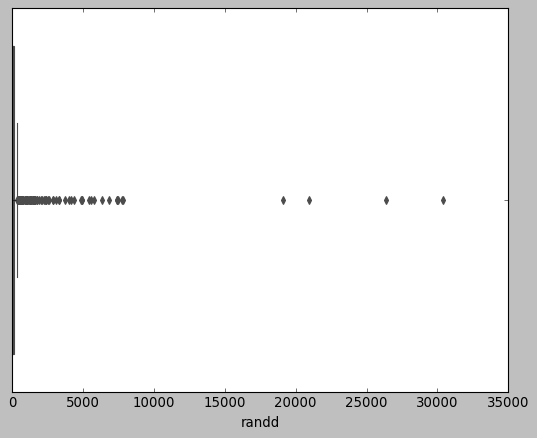

In [29]:
sns.boxplot(pm1['randd'])


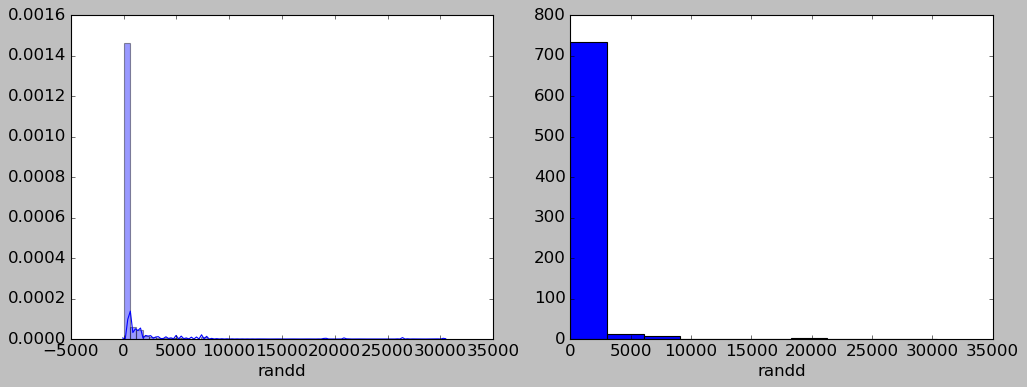

In [30]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))
#distplot
sns.distplot(pm1['randd'],ax=ax2)
ax2.set_xlabel('randd', fontsize=15)
ax2.tick_params(labelsize=15)
#histogram
ax3.hist(pm1['randd'])
ax3.set_xlabel('randd', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Evaluating 'employment'

In [31]:
pm1['employment'].unique()
pm1['employment'].value_counts()

4.700000     5
3.500000     5
1.500000     4
0.175000     4
6.500000     4
            ..
19.860002    1
36.747999    1
31.399999    1
0.181000     1
43.900007    1
Name: employment, Length: 673, dtype: int64

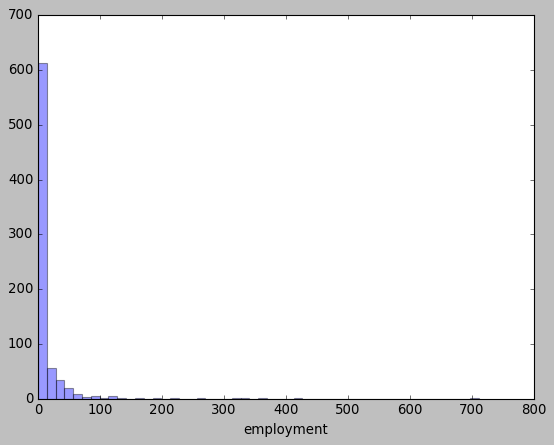

In [32]:
sns.distplot(pm1['employment'],kde=False)

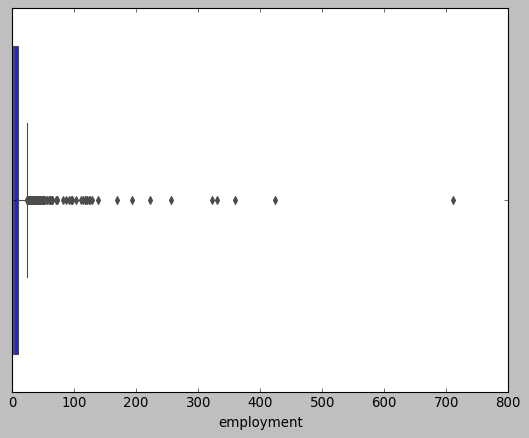

In [33]:
sns.boxplot(pm1['employment'])

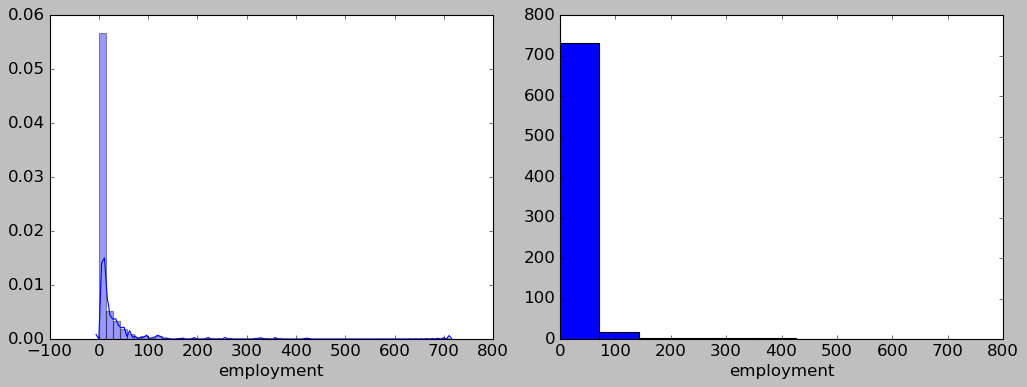

In [34]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))
#distplot
sns.distplot(pm1['employment'],ax=ax2)
ax2.set_xlabel('employment', fontsize=15)
ax2.tick_params(labelsize=15)
#histogram
ax3.hist(pm1['employment'])
ax3.set_xlabel('employment', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Evaluating 'tobinq'

In [35]:
pm1['tobinq'].unique()
pm1['tobinq'].value_counts()

20.000000    11
1.741800      2
1.215128      1
1.485272      1
1.445123      1
             ..
1.209691      1
1.724155      1
1.253085      1
1.326629      1
6.253986      1
Name: tobinq, Length: 727, dtype: int64

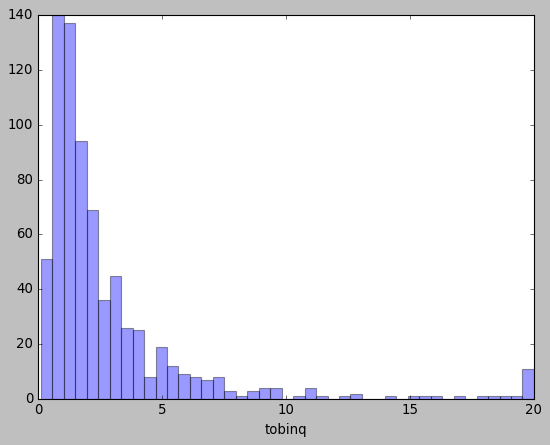

In [36]:
sns.distplot(pm1['tobinq'],kde=False)

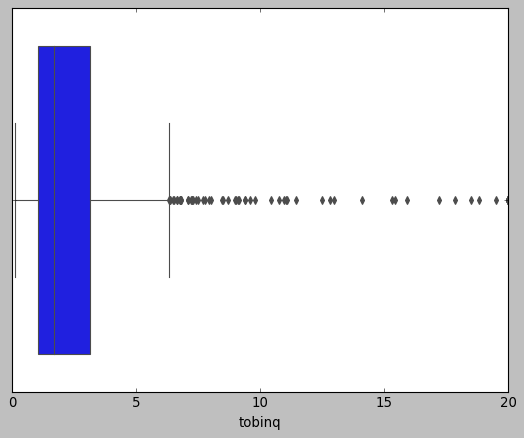

In [37]:
sns.boxplot(pm1['tobinq'])

C:\Users\ANIL FULE\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ANIL FULE\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


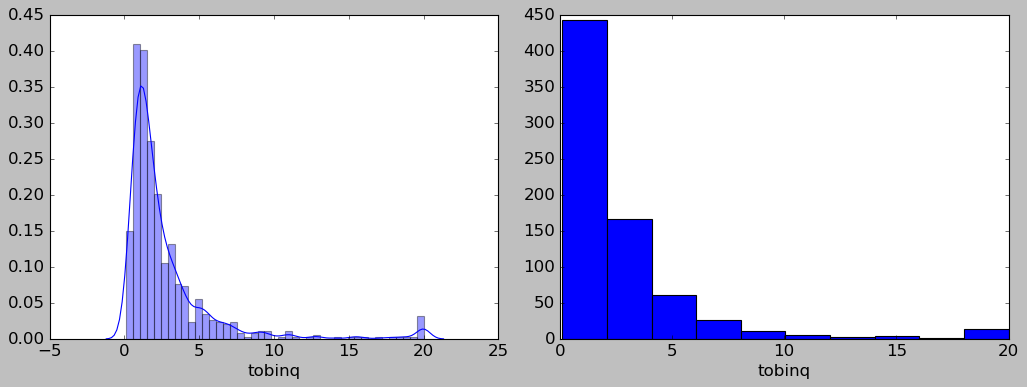

In [38]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))
#distplot
sns.distplot(pm1['tobinq'],ax=ax2)
ax2.set_xlabel('tobinq', fontsize=15)
ax2.tick_params(labelsize=15)
#histogram
ax3.hist(pm1['tobinq'])
ax3.set_xlabel('tobinq', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Evaluating 'Value'

In [39]:
pm1['value'].unique()
pm1['value'].value_counts()

533.056000     2
45.584790      1
923.907401     1
1598.680773    1
670.553100     1
              ..
651.378994     1
4592.397586    1
235.653898     1
4799.796738    1
237.424252     1
Name: value, Length: 758, dtype: int64

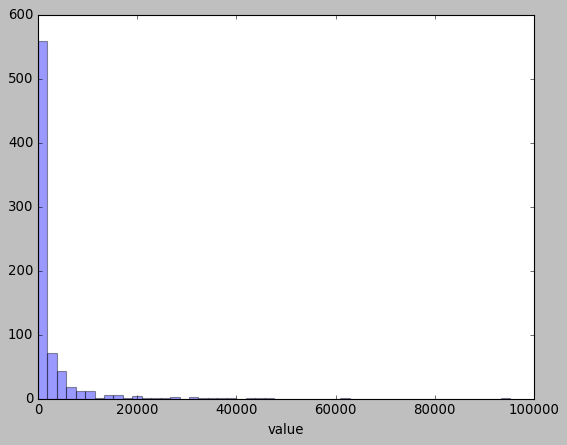

In [40]:
sns.distplot(pm1['value'],kde=False)

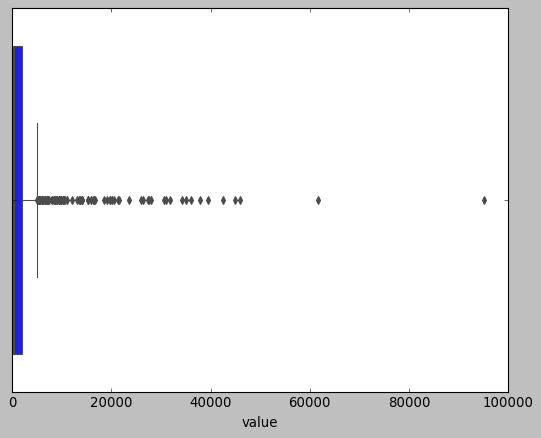

In [41]:
sns.boxplot(pm1['value'])

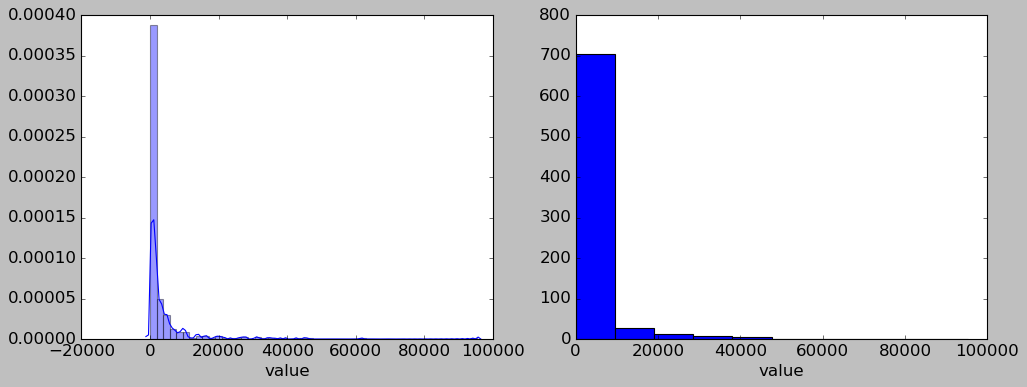

In [42]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))
#distplot
sns.distplot(pm1['value'],ax=ax2)
ax2.set_xlabel('value', fontsize=15)
ax2.tick_params(labelsize=15)
#histogram
ax3.hist(pm1['value'])
ax3.set_xlabel('value', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Evaluating 'institutions'

In [43]:
pm1['institutions'].unique()
pm1['institutions'].value_counts()

0.00     7
69.74    3
71.12    3
52.53    2
25.58    2
        ..
38.20    1
43.62    1
3.33     1
23.58    1
21.00    1
Name: institutions, Length: 716, dtype: int64

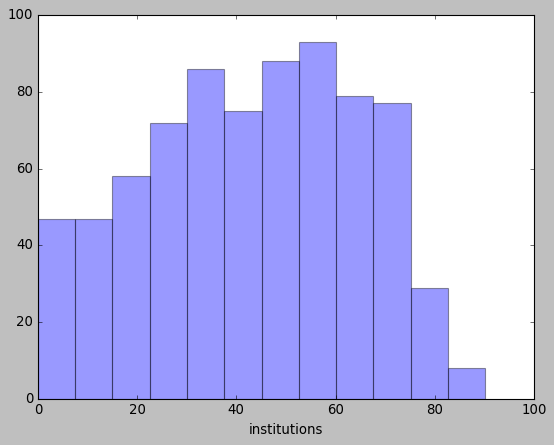

In [44]:
sns.distplot(pm1['institutions'],kde=False)

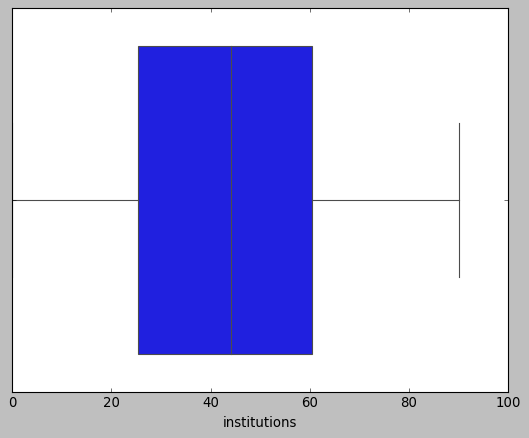

In [45]:
sns.boxplot(pm1['institutions'])

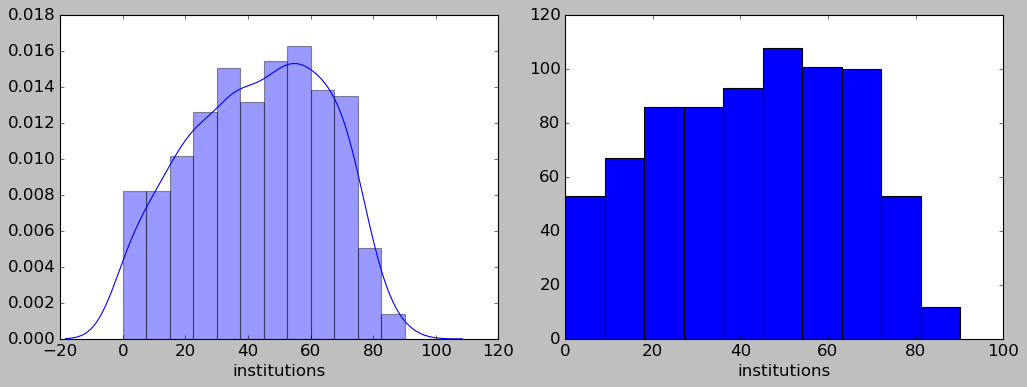

In [46]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))
#distplot
sns.distplot(pm1['institutions'],ax=ax2)
ax2.set_xlabel('institutions', fontsize=15)
ax2.tick_params(labelsize=15)
#histogram
ax3.hist(pm1['institutions'])
ax3.set_xlabel('institutions', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Evaluating 'sp500'

In [47]:
pm1['sp500'].unique()
pm1['sp500'].value_counts()

0    542
1    217
Name: sp500, dtype: int64

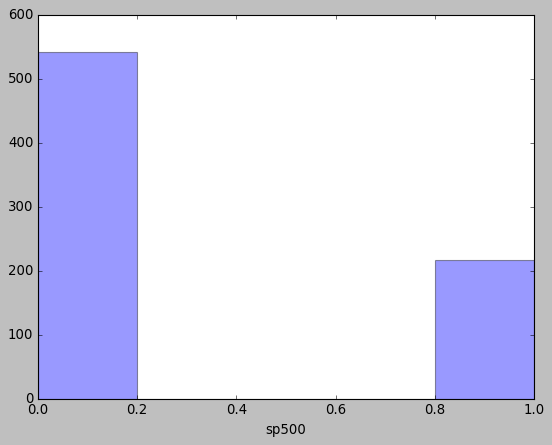

In [48]:
sns.distplot(pm1['sp500'],kde=False)

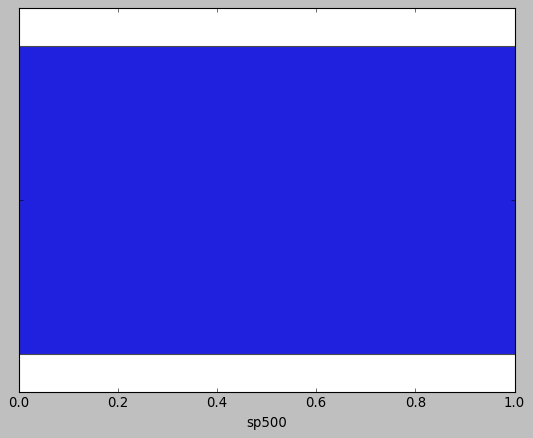

In [49]:
sns.boxplot(pm1['sp500'])

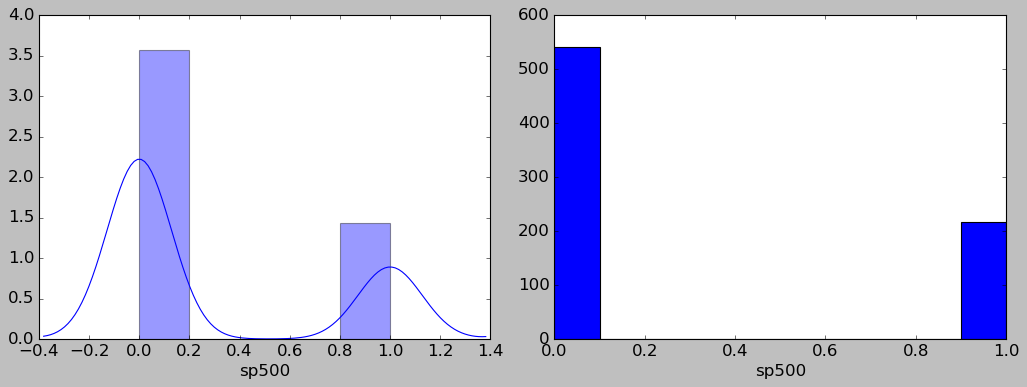

In [50]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))
#distplot
sns.distplot(pm1['sp500'],ax=ax2)
ax2.set_xlabel('sp500', fontsize=15)
ax2.tick_params(labelsize=15)
#histogram
ax3.hist(pm1['sp500'])
ax3.set_xlabel('sp500', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

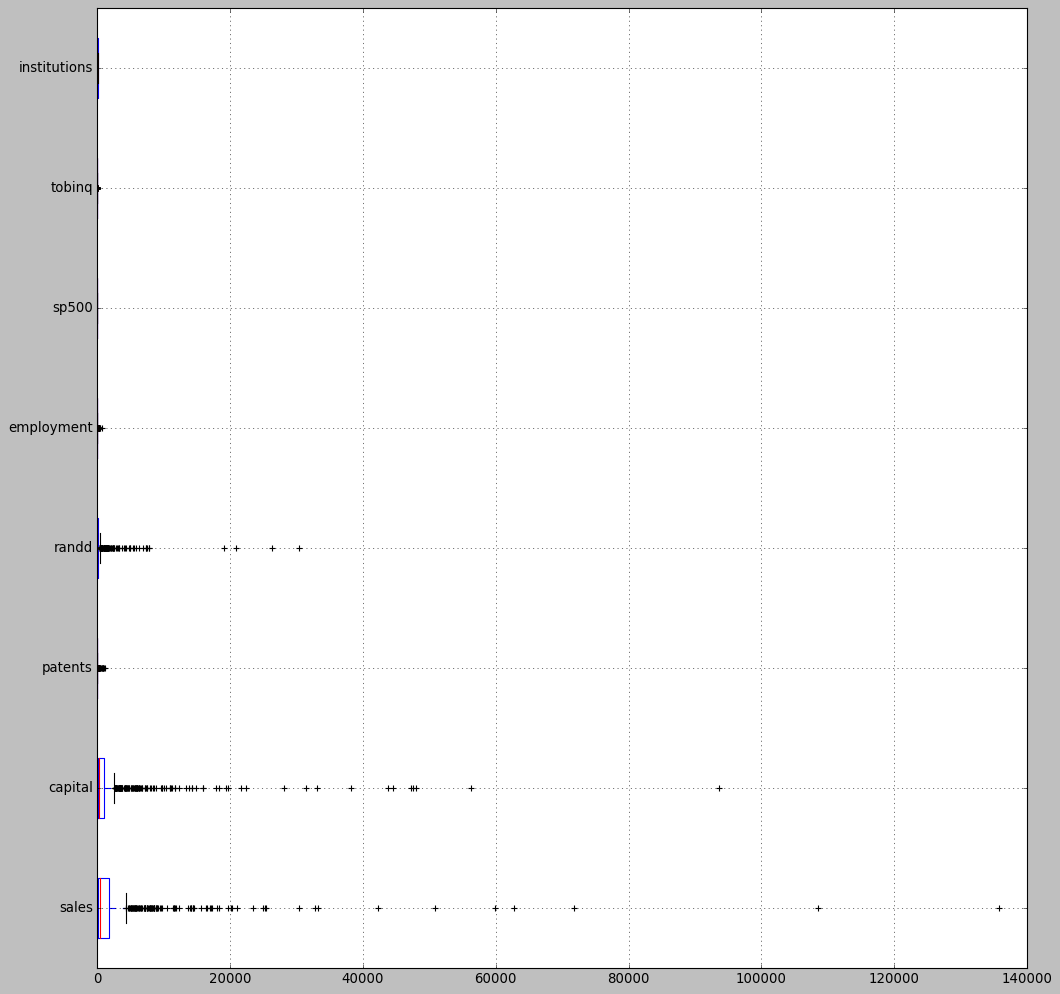

In [51]:
plt.figure(figsize=(15,15))
pm1[['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq', 'institutions']].boxplot(vert=0)

# Multivariate analysis Checking pair plot for continuous variables

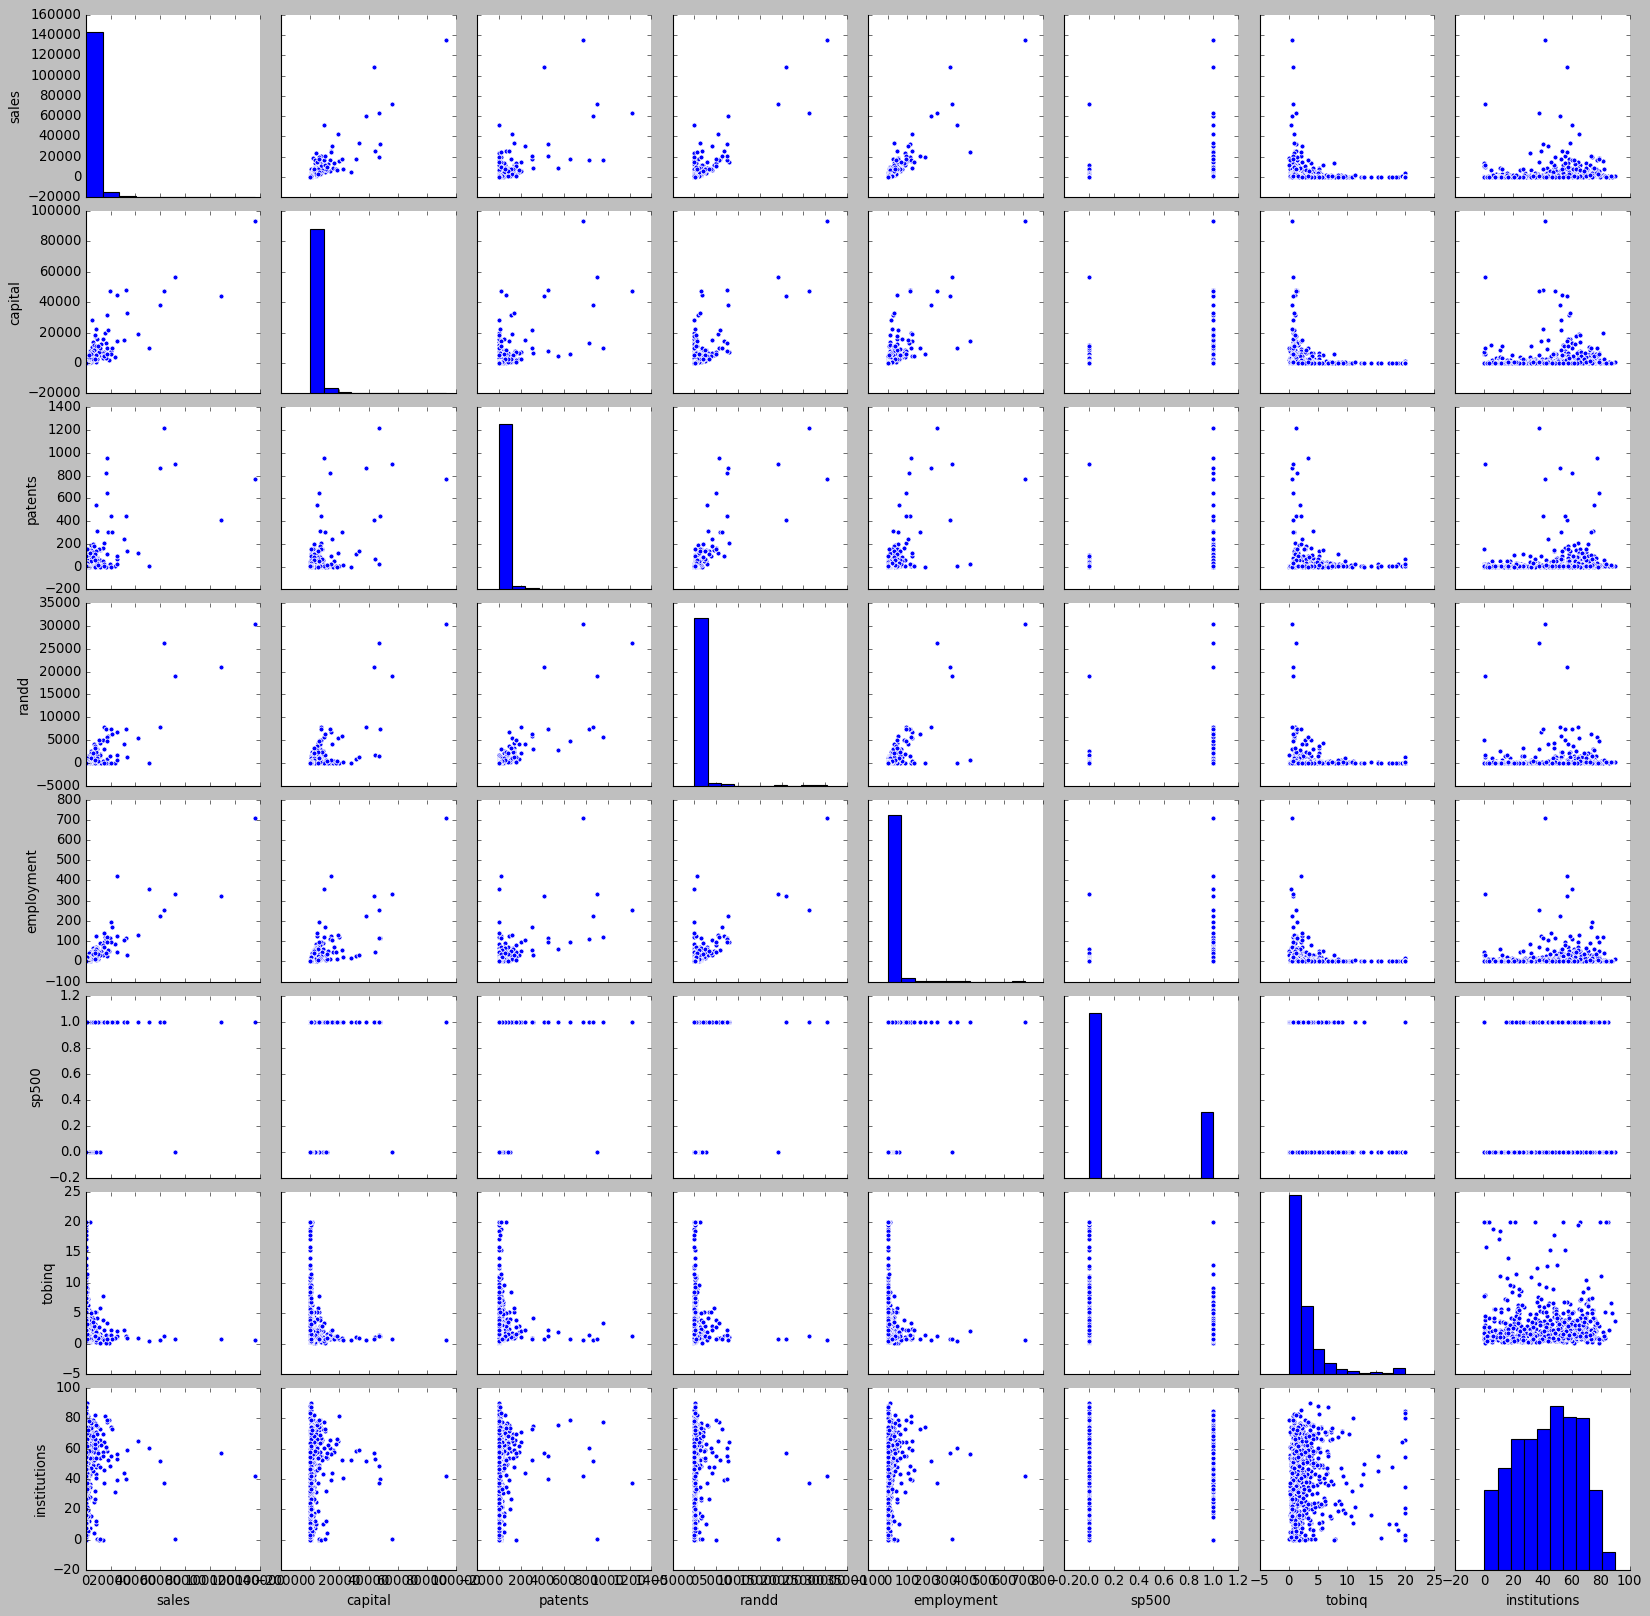

In [52]:
sns.pairplot(pm1[['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq', 'institutions']])

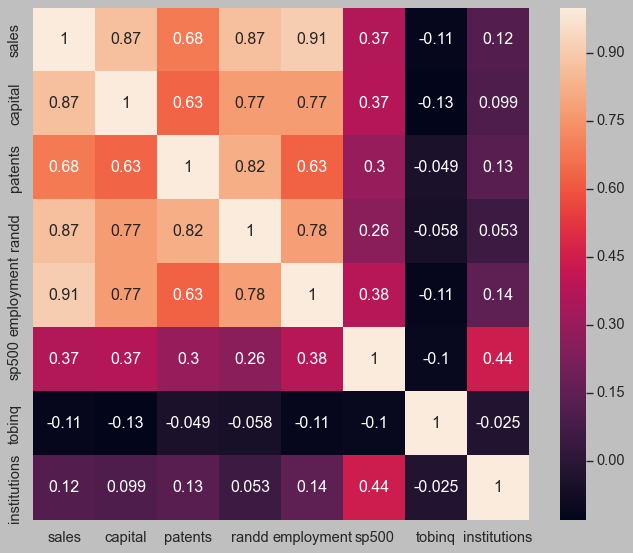

In [53]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(pm1[['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq', 'institutions']].corr(), annot=True)

In [54]:
pm1.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [55]:
pm1 = pm1.apply(lambda x: x.fillna(x.median()),axis=0)

In [56]:
pm1.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

In [57]:
pm1.dtypes

sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500             int64
tobinq          float64
value           float64
institutions    float64
dtype: object

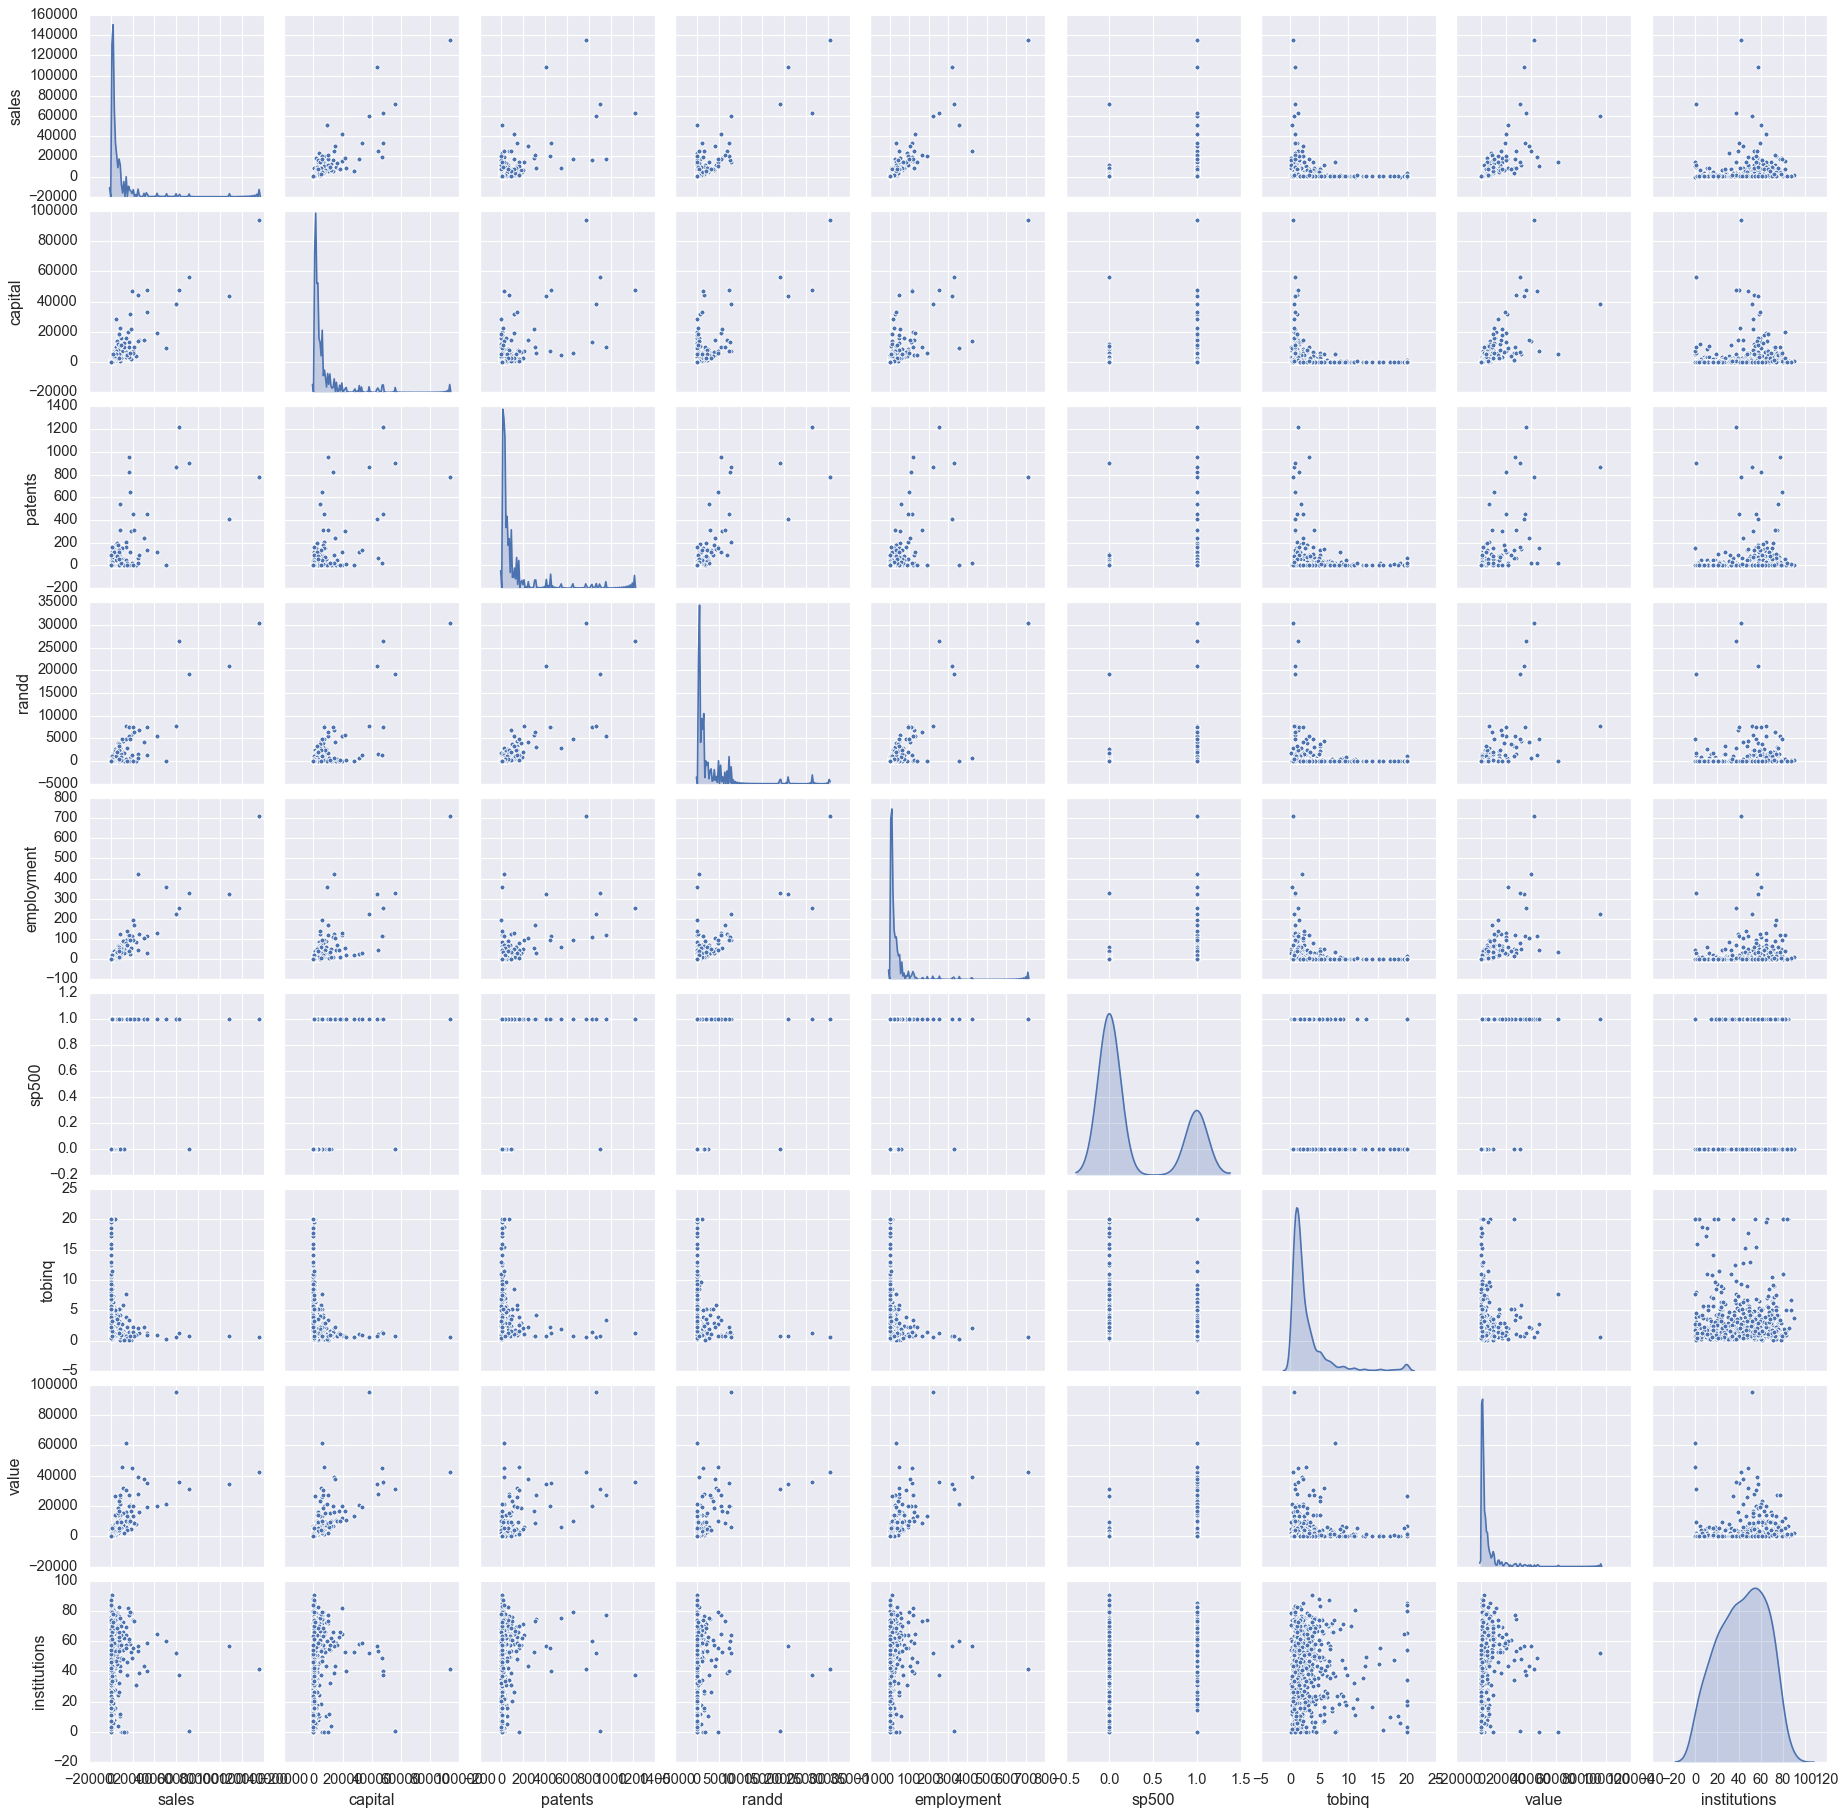

In [58]:
#Pairplot
v = pm1.iloc[:, 0:10]
sns.pairplot(v,diag_kind='kde')

In [59]:
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler()

In [60]:
pm1.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq',
       'value', 'institutions'],
      dtype='object')

In [61]:
pm1_scaled = pm1

In [62]:
pm1_scaled['sales_MinMaxScale'] = minmax_scale.fit_transform(pm1[['sales']])[:,0]

In [63]:
pm1_scaled['capital_MinMaxScale'] = minmax_scale.fit_transform(pm1[['capital']])[:,0]

In [64]:
pm1_scaled['patents_MinMaxScale'] = minmax_scale.fit_transform(pm1[['patents']])[:,0]

In [65]:
pm1_scaled['randd_MinMaxScale'] = minmax_scale.fit_transform(pm1[['randd']])[:,0]

In [66]:
pm1_scaled['employment_MinMaxScale'] = minmax_scale.fit_transform(pm1[['employment']])[:,0]

In [67]:
pm1_scaled['sp500'] = minmax_scale.fit_transform(pm1[['sp500']])[:,0]

In [68]:
pm1_scaled['tobinq_MinMaxScale'] = minmax_scale.fit_transform(pm1[['tobinq']])[:,0]

In [69]:
pm1_scaled['value_MinMaxScale'] = minmax_scale.fit_transform(pm1[['value']])[:,0]

In [70]:
pm1_scaled['institutions_MinMaxScale'] = minmax_scale.fit_transform(pm1[['institutions']])[:,0]

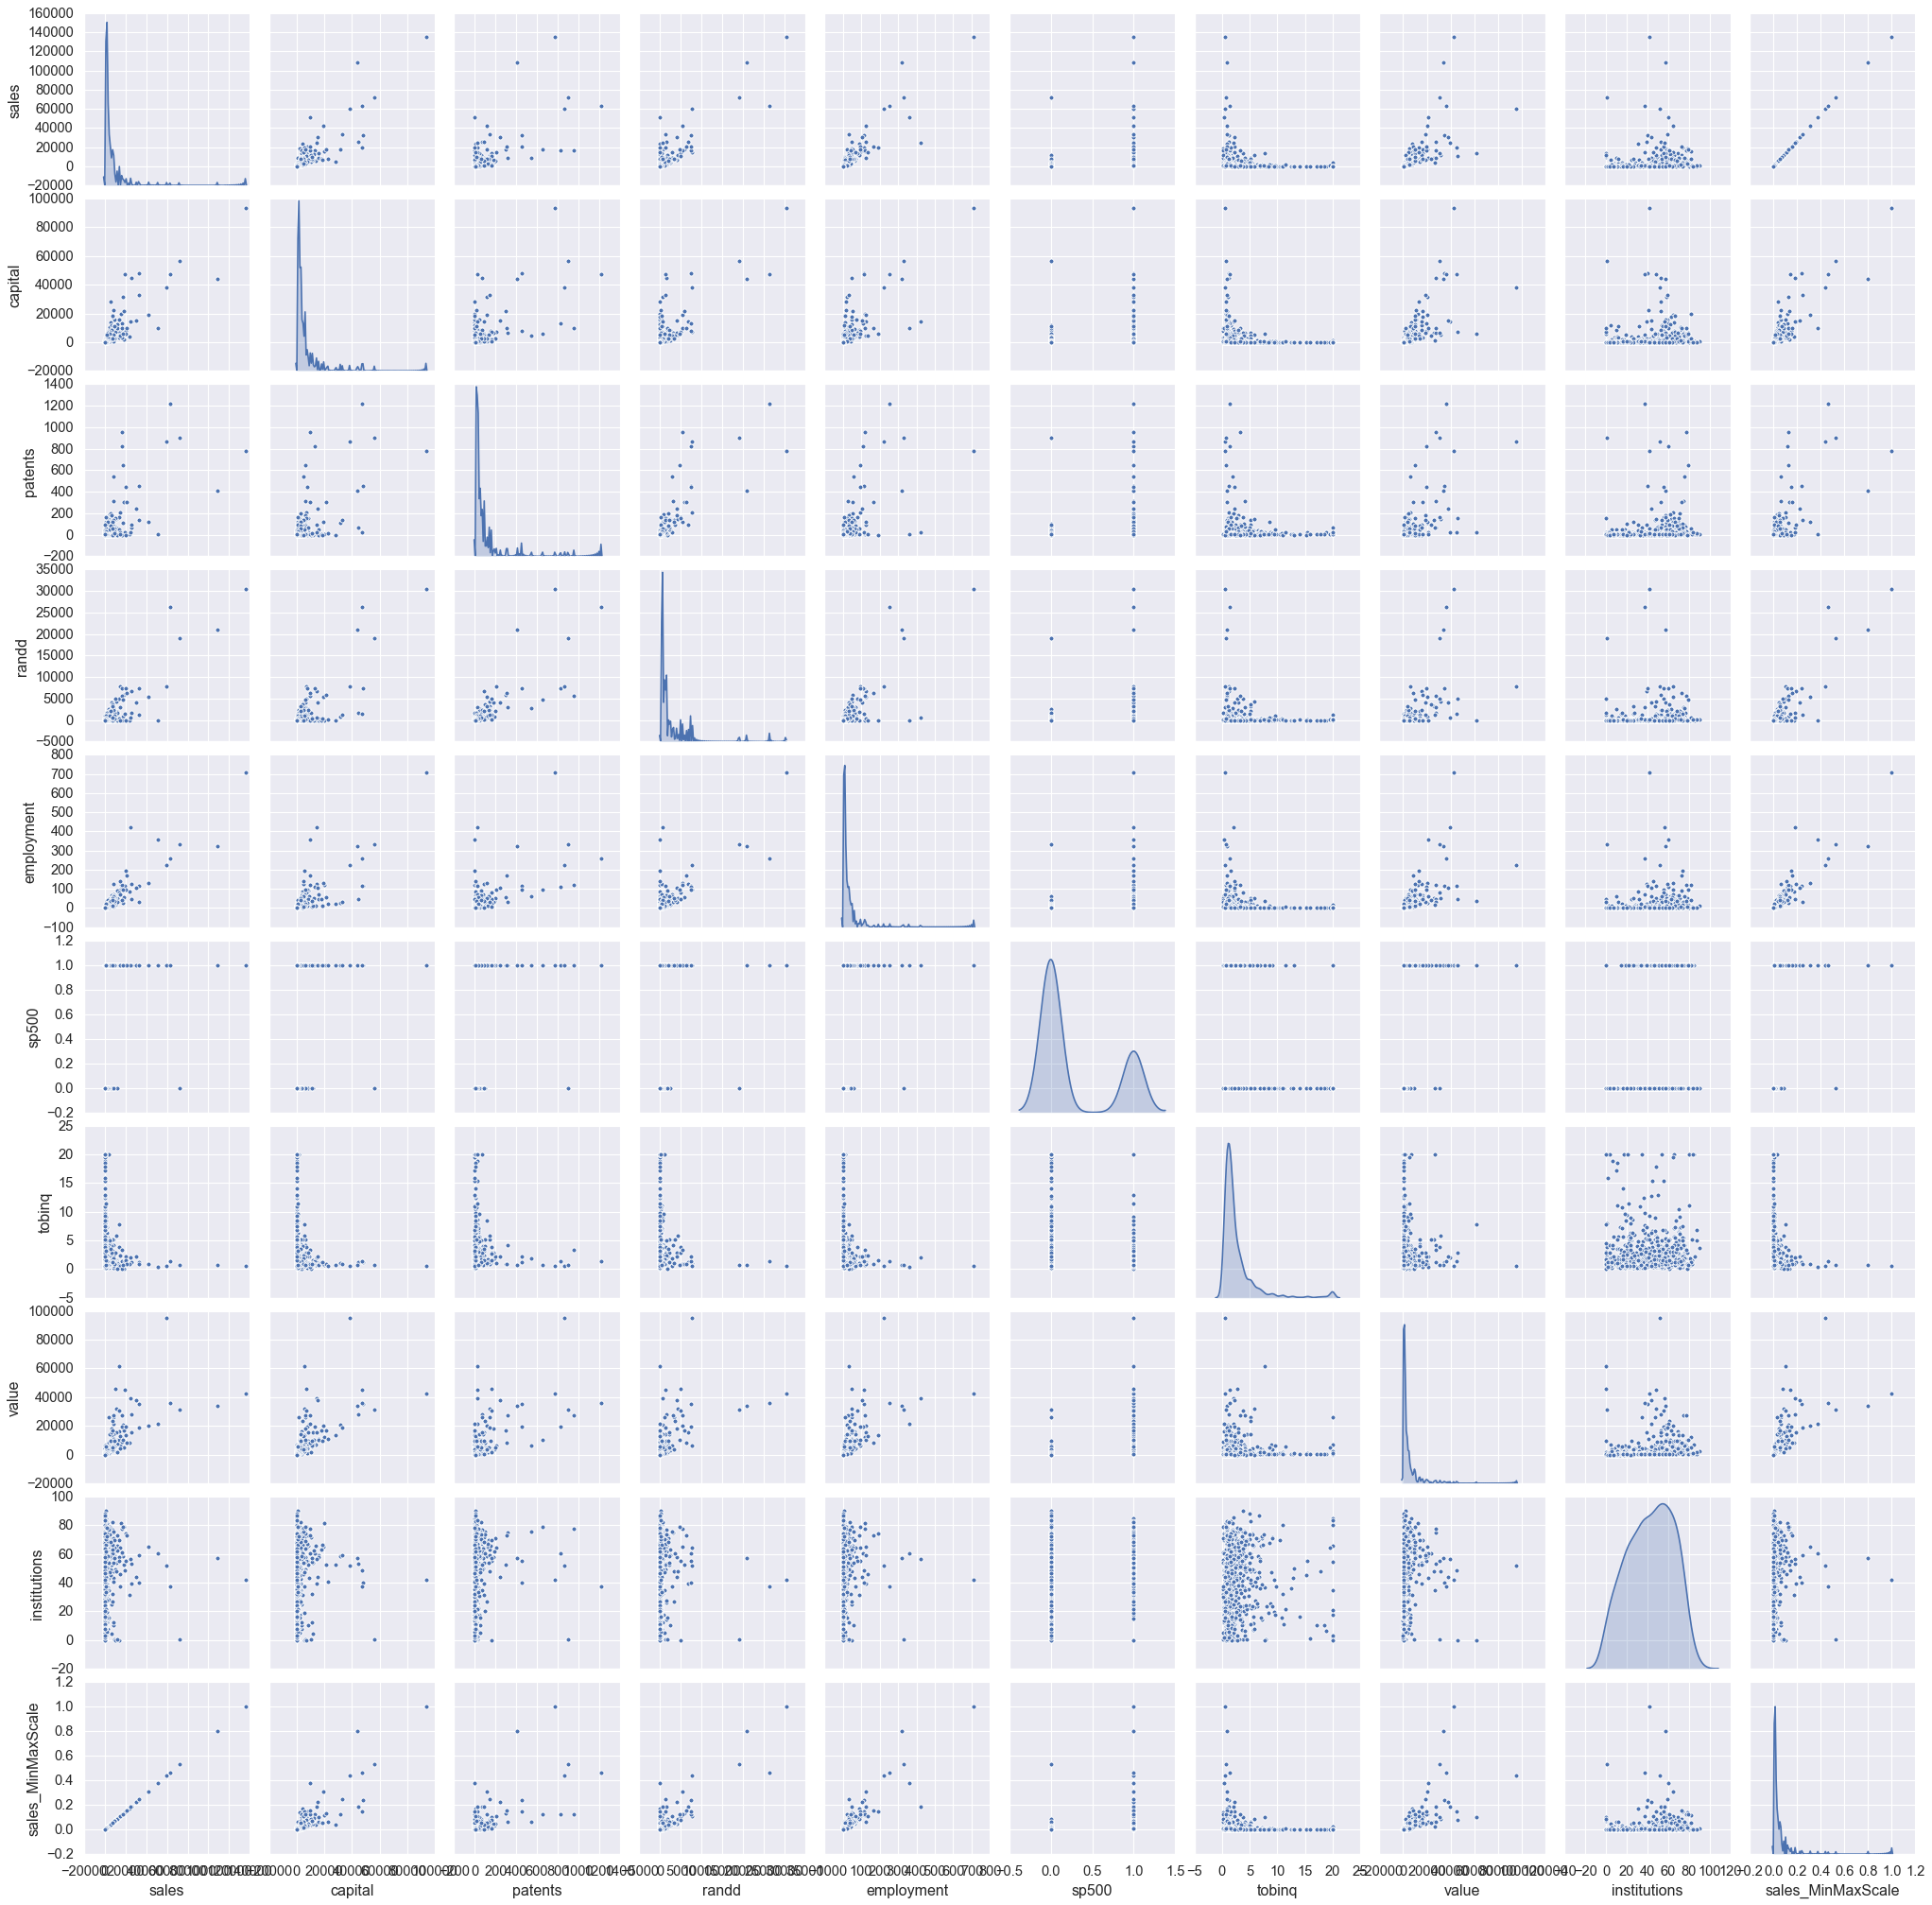

In [71]:
#Pairplot
v = pm1_scaled.iloc[:, 0:10]
sns.pairplot(v,diag_kind='kde')

In [72]:
pm1_scaled.head(5)

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions,sales_MinMaxScale,capital_MinMaxScale,patents_MinMaxScale,randd_MinMaxScale,employment_MinMaxScale,tobinq_MinMaxScale,value_MinMaxScale,institutions_MinMaxScale
0,826.995050,161.603986,10,382.078247,2.306000,0.0,11.049511,1625.453755,80.27,0.006093,0.001725,0.008197,0.012558,0.003236,0.549797,0.017055,0.890405
1,407.753973,122.101012,2,0.000000,1.860000,0.0,0.844187,243.117082,59.02,0.003004,0.001304,0.001639,0.000000,0.002608,0.036476,0.002533,0.654687
2,8407.845588,6221.144614,138,3296.700439,49.659005,1.0,5.205257,25865.233800,47.70,0.061960,0.066447,0.113115,0.108354,0.069856,0.255835,0.271703,0.529118
3,451.000010,266.899987,1,83.540161,3.071000,0.0,0.305221,63.024630,26.88,0.003323,0.002850,0.000820,0.002746,0.004312,0.009367,0.000641,0.298170
4,174.927981,140.124004,2,14.233637,1.947000,0.0,1.063300,67.406408,49.46,0.001288,0.001496,0.001639,0.000468,0.002731,0.047498,0.000687,0.548641


In [73]:
f = pm1_scaled

In [74]:
x = pm1.drop('sales', axis=1)
y = pm1[['sales']]

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1 )

In [77]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [78]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is -9.545287877558574e-17
The coefficient for patents is 5.4040068918274234e-14
The coefficient for randd is -4.599346959240712e-15
The coefficient for employment is 9.541647023532363e-15
The coefficient for sp500 is 2.3229421258461115e-13
The coefficient for tobinq is -6.190644416698962e-13
The coefficient for value is 7.40033137545563e-16
The coefficient for institutions is 2.698694618792278e-13
The coefficient for sales_MinMaxScale is 135696.650200008
The coefficient for capital_MinMaxScale is 1.4433741871223242e-11
The coefficient for patents_MinMaxScale is 1.0470421745201577e-11
The coefficient for randd_MinMaxScale is -6.002097436383921e-12
The coefficient for employment_MinMaxScale is 6.288189524849041e-12
The coefficient for tobinq_MinMaxScale is 3.6288623363863173e-12
The coefficient for value_MinMaxScale is 5.85735477373656e-12
The coefficient for institutions_MinMaxScale is -2.2178924735384632e-11


In [79]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.13799999199773083


In [80]:
regression_model.score(X_train, y_train)

1.0

In [81]:
regression_model.score(X_test, y_test)

1.0

In [82]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,capital,patents,randd,employment,sp500,tobinq,value,institutions,sales_MinMaxScale,capital_MinMaxScale,patents_MinMaxScale,randd_MinMaxScale,employment_MinMaxScale,tobinq_MinMaxScale,value_MinMaxScale,institutions_MinMaxScale,sales
626,1315.696256,15,73.275818,16.472000,0.0,1.657513,2231.870118,31.47,0.014349,0.014052,0.012295,0.002408,0.023166,0.077386,0.023426,0.349085,1947.224100
333,15.258002,2,9.252643,0.566000,0.0,0.381755,9.877838,21.69,0.000444,0.000162,0.001639,0.000304,0.000788,0.013216,0.000083,0.240599,60.327997
257,538.188036,20,87.388641,6.627000,0.0,2.126738,1019.443780,69.64,0.007853,0.005748,0.016393,0.002872,0.009315,0.100988,0.010689,0.772490,1065.748032
173,807.215091,0,68.900185,7.607001,1.0,3.151469,2221.768944,69.69,0.008795,0.008621,0.000000,0.002265,0.010694,0.152531,0.023320,0.773045,1193.647768
242,402.508010,2,0.000000,1.550000,0.0,2.154388,358.040202,85.42,0.001209,0.004299,0.001639,0.000000,0.002172,0.102379,0.003741,0.947532,164.135025


In [83]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'sales ~ capital+patents+randd+employment+sp500+tobinq+value+institutions', data = data_train).fit()
lm1.params

Intercept        52.800525
capital           0.414245
patents          -5.045233
randd             1.026059
employment       83.958084
sp500          -100.437519
tobinq          -31.406252
value             0.126681
institutions      1.055490
dtype: float64

In [84]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     960.3
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          1.37e-306
Time:                        20:17:03   Log-Likelihood:                -4831.5
No. Observations:                 531   AIC:                             9681.
Df Residuals:                     522   BIC:                             9719.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       52.8005    233.075      0.227   

In [85]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [86]:
import math
math.sqrt(mse)

6.707557690686185e-12

In [87]:
regression_model.score(X_test, y_test)

1.0

In [88]:
y_pred = regression_model.predict(X_test)

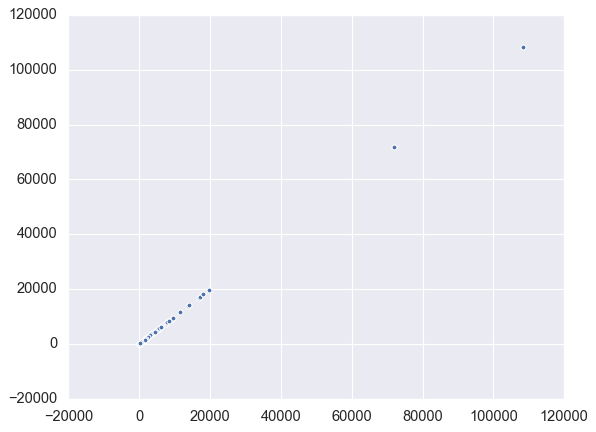

In [89]:
plt.scatter(y_test['sales'], y_pred)

In [90]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [91]:
from scipy.stats import zscore

X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [92]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [93]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is -9.183833128426548e-17
The coefficient for patents is -3.842540389132717e-16
The coefficient for randd is 3.0432829568485474e-16
The coefficient for employment is -5.5357758249068575e-18
The coefficient for sp500 is -7.972249570162327e-17
The coefficient for tobinq is -1.1037106318906521e-16
The coefficient for value is 3.256524714334024e-16
The coefficient for institutions is 1.820165406406637e-16
The coefficient for sales_MinMaxScale is 0.9999999999999998
The coefficient for capital_MinMaxScale is -1.4542587891354196e-16
The coefficient for patents_MinMaxScale is -3.842652265404507e-16
The coefficient for randd_MinMaxScale is 3.862499124263171e-17
The coefficient for employment_MinMaxScale is 1.9467947934152857e-16
The coefficient for tobinq_MinMaxScale is -2.679777324912361e-16
The coefficient for value_MinMaxScale is -3.4386549787538685e-18
The coefficient for institutions_MinMaxScale is -1.7633044065440624e-16


In [94]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6.6906095645960675e-18


In [95]:
regression_model.score(X_test_scaled, y_test_scaled)

1.0

In [96]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [97]:
import math

math.sqrt(mse)

7.005589434471306e-16

In [98]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

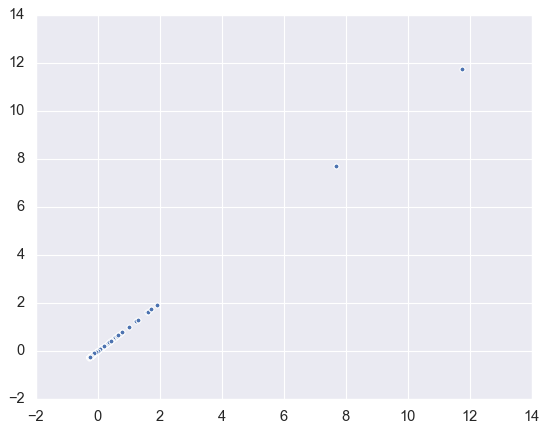

In [99]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['sales'], y_pred)

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 

C:\Users\ANIL FULE\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [102]:
i=0
for column in x.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

capital ---> inf
patents ---> inf
randd ---> inf
employment ---> inf
sp500 ---> 1.6075008783700064
tobinq ---> inf
value ---> inf
institutions ---> inf
sales_MinMaxScale ---> 14.125259154459739
capital_MinMaxScale ---> inf
patents_MinMaxScale ---> inf
